# Solving N-Queen Problem using Tabu Search

Q. The N-Queen problem is the problem of placing N chess queens on an N×N chessboard so that no two queens attack each other. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Get the initial state
def get_initial_state(board_size):
    queens = list(range(board_size))
    random.shuffle(queens)
    return queens

In [3]:
# Calculate the number of attacking queens on the board
def num_attacking_queens(queens):
    """
    this function is analyzing a chessboard with queens
    placed on it and counting how many pairs
    of queens are in a position to capture each other.

    Args:
        queens (_type_): _description_

    Returns:
        _type_: _description_
    """
    board_size = len(queens)#7
    num_attacks = 0
    for i in range(board_size):
        for j in range(i + 1, board_size):
            if queens[i] == queens[j] or abs(queens[i] - queens[j]) == j - i:
                #if queens[i] == queens[j]: This checks if two queens are in the same column,
                #abs(queens[i] - queens[j]) == j - i: This checks for diagonal attacks. If the absolute difference between the column positions is equal to the difference in their row positions, the queens are on the same diagonal.
                num_attacks += 1
    return num_attacks

In [4]:
# Get the best move
def get_best_move(queens, tabu_list):
    """
    In simple terms, this function is used in a chess-like puzzle to 
    find the best move to reposition a queen. It looks at all possible moves, 
    avoids repeating any moves that didn't work well before (using the tabu list),
    and selects the move that results in the fewest queens being able to attack each other.
    The goal is to find a position on the board where the queens are placed so that no queen is threatened by another.

    Args:
        queens (_type_): _description_
        tabu_list (_type_): _description_

    Returns:
        _type_: _description_
    """
    board_size = len(queens)
    best_move = None
    best_num_attacks = board_size * (board_size - 1) // 2
    for i in range(board_size):
        for j in range(board_size):
            if queens[i] != j:# checks if moving the queen in the ith row to the jth column is actually a move (i.e., the queen isn't already in that column).
                new_queens = queens.copy()#Creates a copy of the current board.
                new_queens[i] = j#Moves the queen in the ith row to the jth column.
                if str(new_queens) not in tabu_list:
                    num_attacks = num_attacking_queens(new_queens)
                    if num_attacks < best_num_attacks:# If the new configuration has fewer attacks than the current best,
                        best_move = (i, j)#Update best_move to this move.
                        best_num_attacks = num_attacks#Update the minimum number of attacks
    return best_move

# notice two loops: n^2 complexity?

In [5]:
# Update the tabu list
def update_tabu_list(tabu_list, tabu_tenure, move):
    """
    In simple terms, this function updates the list of forbidden 
    moves in the Tabu Search algorithm. Every time a new move 
    is made, it's added to this list. If the list gets too long, 
    the oldest move is removed to make space. 
    This process helps the algorithm remember which moves to 
    avoid for a certain period (defined by tabu_tenure), 
    so it doesn't keep repeating the same moves.

    Args:
        tabu_list (_type_): _description_
        tabu_tenure (_type_): _description_
        move (_type_): _description_
    """
    tabu_list.append(str(move))
    if len(tabu_list) > tabu_tenure:
        tabu_list.pop(0)# remove one entry

In [6]:
# Tabu search
def tabu_search(num_iterations, tabu_tenure, max_non_improvement, queens):
    num_non_improvement = 0
    best_queens = queens
    best_num_attacks = num_attacking_queens(queens)
    tabu_list = []

    for i in range(num_iterations):
        move = get_best_move(queens, tabu_list)
        if move is not None:
            queens[move[0]] = move[1]
            update_tabu_list(tabu_list, tabu_tenure, move)
            num_attacks = num_attacking_queens(queens)
            if num_attacks < best_num_attacks:
                best_queens = queens
                best_num_attacks = num_attacks
                num_non_improvement = 0
        else: # when no improvement-->
            num_non_improvement += 1
            if num_non_improvement >= max_non_improvement:
                break

    return best_queens, num_attacks

In [7]:
# Solve the problem using Tabu Search

# Set board size for nxn Queeen problem
board_size = 7 # 7*7 board

# Define the number of iterations for the search
num_iterations = 2000

# Define the tabu tenure
tabu_tenure = 10 # this is the number of moves that are tabu

# Define the number of moves without improvement before considering a solution is stuck
max_non_improvement = 50 # stoppage criteria

best_board, num_attacks=tabu_search(num_iterations, tabu_tenure, max_non_improvement, get_initial_state(board_size))

In [8]:
print("Best found board is ", best_board)
print("Number of attacks in the best found board is ", num_attacks)

Best found board is  [1, 1, 5, 2, 6, 3, 0]
Number of attacks in the best found board is  1


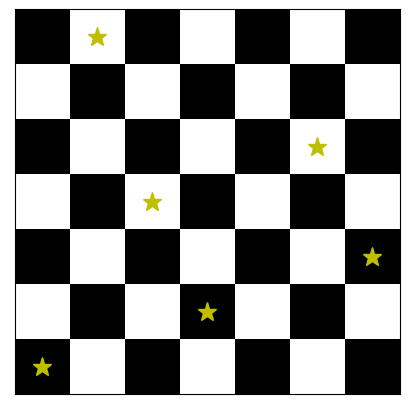

In [9]:
# Visualizae the solution
all_queens = range(board_size)
states=[]
soln=np.array(best_board)
for i in all_queens:
    for j in all_queens:
        if best_board[j] == i:
            # There is a queen in column j, row i.
            states.append(True)
        else:
            states.append(None)     
            
states=np.array(states).reshape(-1, board_size)

fig = plt.figure(figsize=(5,5))
# # Convert 2D board to 1D marker list
markers = [
    x.tolist().index(True) if True in x.tolist() else None
    for x in states
]
res = np.add.outer(range(board_size), range(board_size)) % 2
plt.imshow(res, cmap="binary_r")
plt.xticks([])
plt.yticks([])
plt.plot(markers, marker="*", linestyle="None", markersize=100/board_size, color="y")
# plt.savefig('CH06_F17_NQueen.png', format='png', dpi=300)